# 1) BioMassters: Estimating biomass in Finnish forests 


Remote sensing methods offer a much faster, less destructive, and more geographically expansive biomass estimate.

Sentinel-1 and Sentinel-2 are two of five missions developed by the European Commission and the European Space Agency as a part of the Copernicus program, which is an Earth-observation initiative.

job is to estimate the yearly biomass of different sections in Finland's forests using imagery from Sentinel-1 and Sentinel-2.


BioMassters

the team:


Sofia Matias             Emile van Cauwenberghe               Pedro  Lopes                    Luis Sarmento
CEO / Data Engineer      Machine Learning Engineer        Machine Learning Engineer        ML Ops / Data Scientist

## 1.1) The rest of the presentation

- Description of the problem (in a way that the audience may relate to):





- Presentation of the dataset (main considerations only - rows, cols, key features, target if any)
- High level overview of the data preprocessing (highlight just the key actions, not all)
- Comparison of the different models (and metrics that made you chose the final one)
- Brief explanation of the final model and tuning (understandable for regular humans)
- Move to the Streamlit demo (feel free to get very creative!)
- Key learnings/impacts and next steps (to improve the project)

- Keep the design clean and cohesive
- When using text, keep a consistent and large font size
- Whenever you can, favor (good) visualisation over text
- Try to avoid excessive technical jargon as much as you can

In [22]:
complete_months = ["April", "May", "June", "July", "August"]

In [25]:
months_24 = months[months["month"]==24]

In [26]:
months_24


,filename,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm,file_downloaded,file_in_GCS
chip_id,,,,,,,,,,,,
0060c0a5,24,24,24,24,24,24,24,24,24,24,24,24
00e6b793,24,24,24,24,24,24,24,24,24,24,24,24
00fd0698,24,24,24,24,24,24,24,24,24,24,24,24
010966cb,24,24,24,24,24,24,24,24,24,24,24,24
017f206b,24,24,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...
ff7589c0,24,24,24,24,24,24,24,24,24,24,24,24
ff9b942d,24,24,24,24,24,24,24,24,24,24,24,24
ffa9b9f1,24,24,24,24,24,24,24,24,24,24,24,24


In [15]:
1790*0.156168

279.54072

In [6]:
len(months_24)/len(months)

0.1561682079916245

In [11]:
months_up_to = months[months["month"]<=17]

In [12]:
len(months_up_to)/len(months)

0.04519281102774385

In [7]:
train_agbm.head(5)

,filename,chip_id,size,cksum,s3path_us,s3path_eu,s3path_as
0,0003d2eb_agbm.tif,0003d2eb,262482,2036246549,s3://drivendata-competition-biomassters-public-us/train_agbm/0003d2eb_agbm.tif,s3://drivendata-competition-biomassters-public-eu/train_agbm/0003d2eb_agbm.tif,s3://drivendata-competition-biomassters-public-as/train_agbm/0003d2eb_agbm.tif
1,000aa810_agbm.tif,000aa810,262482,2858468457,s3://drivendata-competition-biomassters-public-us/train_agbm/000aa810_agbm.tif,s3://drivendata-competition-biomassters-public-eu/train_agbm/000aa810_agbm.tif,s3://drivendata-competition-biomassters-public-as/train_agbm/000aa810_agbm.tif
2,000d7e33_agbm.tif,000d7e33,262482,277850822,s3://drivendata-competition-biomassters-public-us/train_agbm/000d7e33_agbm.tif,s3://drivendata-competition-biomassters-public-eu/train_agbm/000d7e33_agbm.tif,s3://drivendata-competition-biomassters-public-as/train_agbm/000d7e33_agbm.tif
3,00184691_agbm.tif,00184691,262482,3502312579,s3://drivendata-competition-biomassters-public-us/train_agbm/00184691_agbm.tif,s3://drivendata-competition-biomassters-public-eu/train_agbm/00184691_agbm.tif,s3://drivendata-competition-biomassters-public-as/train_agbm/00184691_agbm.tif
4,001b0634_agbm.tif,001b0634,262482,2397957274,s3://drivendata-competition-biomassters-public-us/train_agbm/001b0634_agbm.tif,s3://drivendata-competition-biomassters-public-eu/train_agbm/001b0634_agbm.tif,s3://drivendata-competition-biomassters-public-as/train_agbm/001b0634_agbm.tif


In [12]:
# Read tif file and get a numpy array 
def image_to_np(path, filename):
  file = os.path.abspath(f'{path}{filename}')
  return tifffile.imread(file)

In [13]:
XS1 = image_to_np('../data/train data/' , '0060c0a5_S1_00.tif')
XS2 = image_to_np('../data/train data/' , '0060c0a5_S2_06.tif')

y = image_to_np('../data/ground truth/' , '0060c0a5_agbm.tif')

In [46]:
y


array([[166.4 , 170.57, 114.  , ...,   0.  ,   0.  ,   0.  ],
       [128.86, 115.34, 212.28, ...,   0.  ,   0.  ,   0.  ],
       [128.86, 115.34, 212.28, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [167.07, 144.26, 203.56, ..., 273.55, 329.19, 280.63],
       [219.11, 221.05, 211.61, ..., 328.53, 348.27, 248.67],
       [219.11, 221.05, 211.61, ..., 328.53, 348.27, 248.67]],
      dtype=float32)

In [49]:
data = image_to_np('../data/train data/' , '0060c0a5_S1_00.tif')

SyntaxError: invalid syntax (2676699156.py, line 1)

### 1.1.1) Compress Data (?)

Do we need to do this - change dtypes?

## 1.2) Clean Data

Do we need to do this?
How do we deal with the months data?

## 1.3) Visualize Data

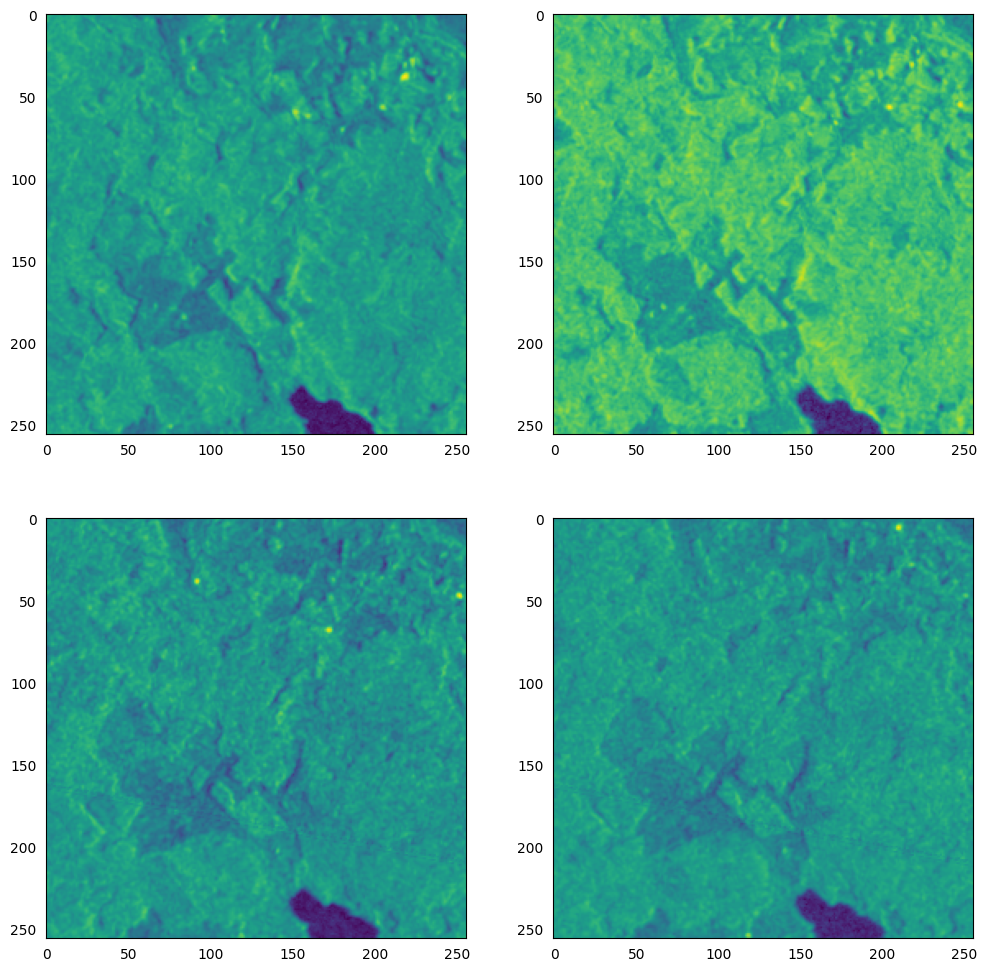

In [14]:
# Function to visualize S1 bands
def S1_view (img):
    _, ax = plt.subplots(2,2, figsize=(12,12))
    ax[0,0].imshow(img[:,:,0]);
    ax[0,0].tick_params(bottom=False, left=False)
    ax[0,1].imshow(img[:,:,1]);
    ax[0,1].tick_params(bottom=False, left=False)
    ax[1,0].imshow(img[:,:,2]);
    ax[1,0].tick_params(bottom=False, left=False)
    ax[1,1].imshow(img[:,:,3]);
    ax[1,1].tick_params(bottom=False, left=False)
    img.shape
    
S1_view(XS1)

array([[[   1,   35,   47, ...,  395,  202,    7],
        [   0,   36,   16, ...,  395,  202,    8],
        [   0,    1,    6, ...,  402,  202,    8],
        ...,
        [8824, 8487, 8710, ...,  347,  360,    0],
        [9106, 8778, 9079, ...,  375,  373,    1],
        [9409, 9129, 9467, ...,  375,  373,    1]],

       [[   0,   68,  114, ...,  395,  202,   10],
        [   0,    1,   12, ...,  395,  202,    7],
        [   0,    0,    4, ...,  402,  202,    6],
        ...,
        [8830, 8606, 8888, ...,  347,  360,    0],
        [9402, 9058, 9303, ...,  375,  373,    1],
        [9930, 9570, 9796, ...,  375,  373,    2]],

       [[   0,   16,   72, ...,  392,  211,    7],
        [   1,    0,    0, ...,  392,  211,    9],
        [   2,    1,    4, ...,  416,  220,    8],
        ...,
        [8743, 8503, 8774, ...,  342,  366,    1],
        [9081, 8896, 9055, ...,  368,  394,    0],
        [9465, 9089, 9327, ...,  368,  394,    1]],

       ...,

       [[   2,    0,    

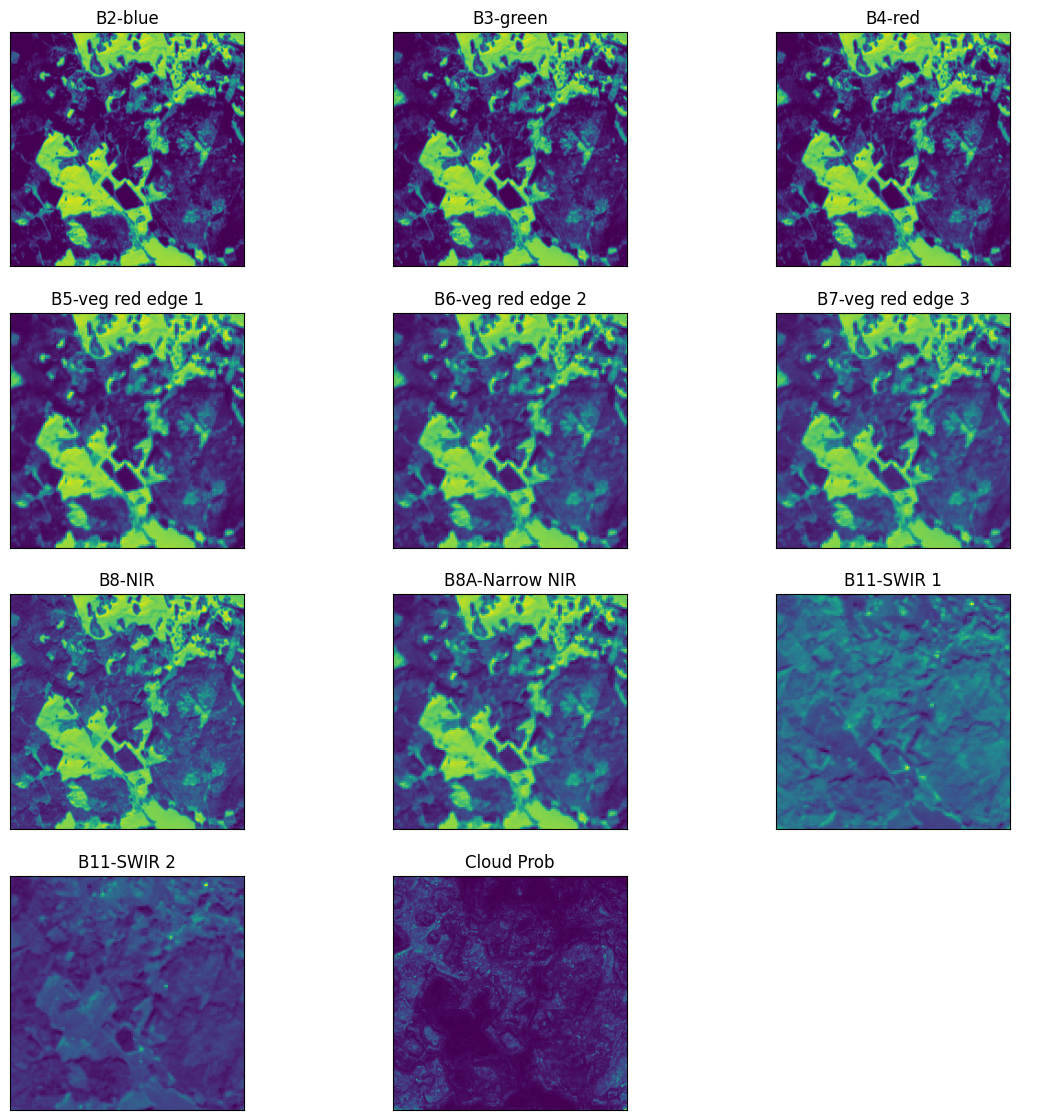

In [15]:
# Function to visualize the 11 bands from S2 images
def S2_image(img):
    axes = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2], 
            [3,0], [3,1]]
    images = list(range(11))
    titles = ['B2-blue','B3-green','B4-red', 'B5-veg red edge 1', 
              'B6-veg red edge 2', 'B7-veg red edge 3', 'B8-NIR', 
              'B8A-Narrow NIR', 'B11-SWIR 1', 'B11-SWIR 2', 'Cloud Prob']

    fig, ax = plt.subplots(4,3, figsize=(14,14))

    for ij, img_num, title in zip(axes, images, titles):
            ax[ij[0],ij[1]].imshow(img [:, :, img_num]);
            ax[ij[0],ij[1]].set_title(title)
            ax[ij[0],ij[1]].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        
    plt.axis('off')
    ax[3,2].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
S2_image(XS2)
XS2

In [16]:
XS1[0].shape

(256, 4)

([], [])

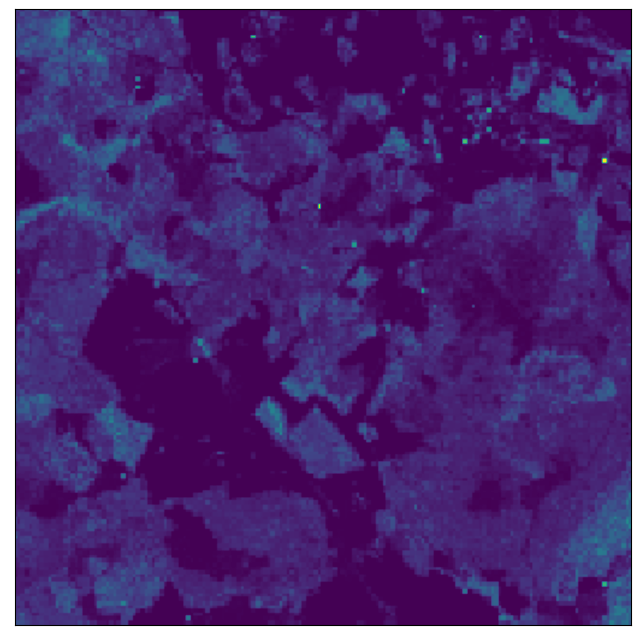

In [17]:
# Visualizing LiDAR image
plt.figure(figsize = (8,8))
plt.imshow(y)
plt.xticks([])
plt.yticks([])

# 3) Model

In [44]:
def define_model_supersimple_convnet():
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(
                15,
                1,
                padding="same",
                activation="relu",
                input_shape=(256, 256),
            ),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(2, activation="softmax")
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=3e-4
        ),  # this LR is overriden by base cycle LR if CyclicLR callback used
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    print(model.summary())

    return model

In [45]:
# update: fit_generator will be deprecated: use fit instead -> apparently works faster with Tensorflow 2.0

model = define_model_supersimple_convnet()
history = model.fit(test[0],
  steps_per_epoch=1000,
  epochs=35,
 )

ValueError: Input 0 of layer "conv2d_9" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 256, 256)

In [43]:
test[3].shape

(256, 256)

In [37]:
test = XS1.T

In [36]:
XS1[0].shape

(256, 4)

In [24]:
model.predict(XS1, XS2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# A pixel value of -9999 indicates missing data

In [15]:
def create_model(data,  eurosat_url='../Weights of pretrained model/Model-multispectral-0.99'):
    print('Importing custom xresnet50 pretrained on eurosat')

    model = xresnet50(c_in=13, c_out=10)
    st = torch.load(eurosat_url)
    model.load_state_dict(st)
    
    m_new = nn.Sequential(*list(model.children())[:-3], AdaptiveConcatPool2d(), Flatten(), nn.Linear(4096, 2))
    learn = Learner(data, m_new, metrics=[accuracy])
    first_layer = learn.layer_groups[0][:-4]
    second_layer = learn.layer_groups[0][-4:]
    learn.layer_groups = [first_layer, second_layer]


    return learn

In [16]:
learn = create_model(XS1)

Importing custom xresnet50 pretrained on eurosat


TypeError: Conv2d.__init__() got an unexpected keyword argument 'c_out'

In [17]:
!pwd

/Users/someone/code/TugaMedia/project-biomassters/project-biomassters/notebooks
